In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
import tensorflow as tf
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
import sys
sys.path.append('..')
from dataset import batcher

In [7]:
MODEL_DIR = '../saved_models/'
LR_RATE = 0.001
OPT = tf.keras.optimizers.Adam(learning_rate=LR_RATE)
LOSS = 'MeanSquaredError'
METRICS = ['RootMeanSquaredError']

In [64]:
# Get test split
# bands = ['BLUE', 'GREEN', 'RED', 'NIR', 'SW_IR1', 'SW_IR2', 'TEMP', 'VIIRS', 'DELTA_TEMP', 'CO']
bands = ['VIIRS']
test_batcher = batcher.Batcher(bands, country_year="ethiopia-2018", bucket=False, shuffle=False, split='test', repeat=1, batch_size=1000).get_dataset()
x_true = []
y_true = []
for x, y in test_batcher:
    x_true.append(x)
    y_true.append(y)

print(np.shape(x_true))

(1, 652, 224, 224, 1)


In [65]:
# Load model
experiments = ['imagery_sample_vgg_regression_NL']

def load_model_from_dir(model_name):
    model_path = MODEL_DIR + model_name + '.h5'
    model = tf.keras.models.load_model(model_path, compile=False)
    
    return model

In [66]:
# Get consumption predictions
trained_model = load_model_from_dir(experiments[0])
trained_model.compile(
            loss=LOSS,
            optimizer=OPT,
            metrics=METRICS,
        )

y_preds = trained_model.predict_on_batch(x_true)
print(y_preds)

2023-02-19 13:02:16.743705: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[[-1.89108700e-01]
 [-6.32122874e-01]
 [-5.63152909e-01]
 [-2.00980365e-01]
 [-2.00676084e-01]
 [-2.69667804e-01]
 [ 1.64067820e-02]
 [-1.93071753e-01]
 [-2.07981735e-01]
 [-3.46948504e-01]
 [-2.12780356e-01]
 [-2.07096368e-01]
 [-2.39727706e-01]
 [-4.28402722e-01]
 [-2.19760686e-01]
 [-1.93199903e-01]
 [-2.01873213e-01]
 [-4.14206326e-01]
 [-2.11106718e-01]
 [-2.51150548e-01]
 [-5.51003695e-01]
 [-1.92683905e-01]
 [-1.98721915e-01]
 [-1.92628145e-01]
 [-1.55874401e-01]
 [-1.89108700e-01]
 [-1.93071753e-01]
 [-1.99311942e-01]
 [-1.85576051e-01]
 [-5.86600184e-01]
 [-1.95053637e-01]
 [-5.58103204e-01]
 [-2.12054908e-01]
 [-4.20475960e-01]
 [-2.41573572e-01]
 [-1.97110265e-01]
 [-1.91753298e-01]
 [-1.88933372e-01]
 [-2.01649070e-01]
 [-2.02487469e-01]
 [-2.05802679e-01]
 [-3.27927232e-01]
 [-4.58505630e-01]
 [ 6.22956380e-02]
 [ 1.57323167e-01]
 [-3.41473892e-02]
 [-1.97591901e-01]
 [-3.03655565e-01]
 [-4.28402722e-01]
 [-3.30061406e-01]
 [-2.06527352e-01]
 [-5.64034760e-01]
 [-7.2110734

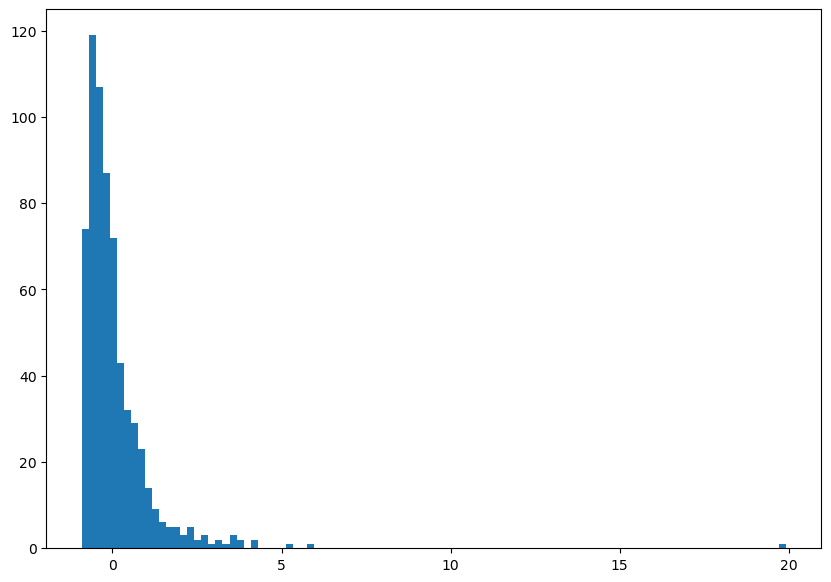

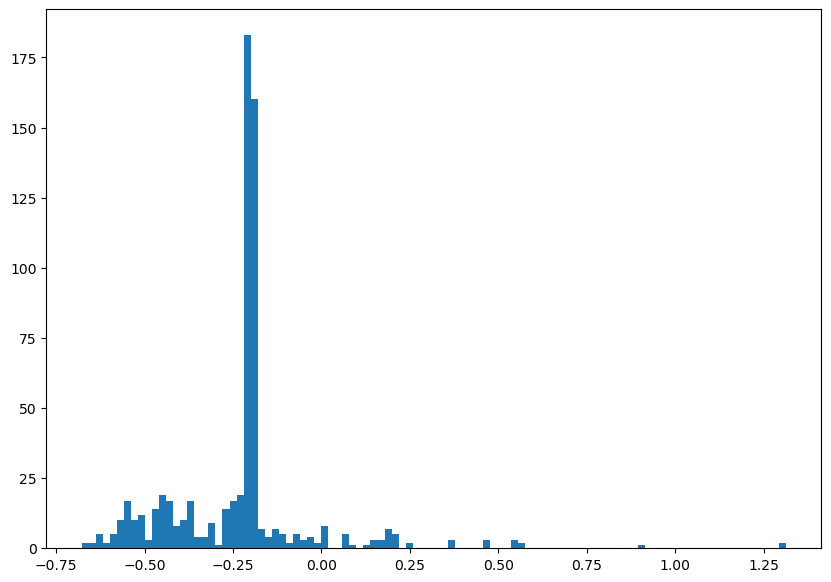

In [70]:
# Find r-squared
y_true = np.squeeze(y_true)
y_preds = np.squeeze(y_preds)

# Plot histograms
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(y_true, bins = 100)
plt.show()

fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(y_preds, bins = 100)
plt.show()


r2 = pearsonr(y_true, y_preds)[0]

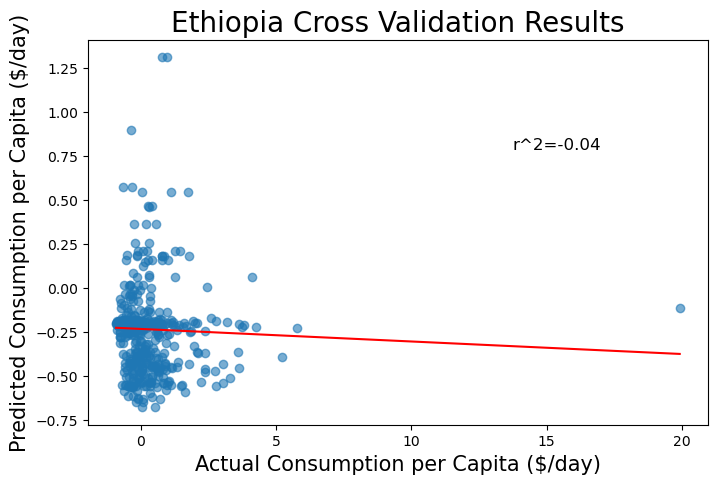

In [68]:
# Plot predictions
country = 'Ethiopia'
fig = plt.figure(figsize=(8,5))
plt.scatter(y_true, y_preds, alpha=0.6)
plt.plot(np.unique(y_true), np.poly1d(np.polyfit(y_true, y_preds, 1))(np.unique(y_true)), color='red')
plt.text(0.5, 0.5, f'r^2={round(r2, 2)}', ha='left', va='top', size=12, transform=ax.transAxes)
plt.xlabel('Actual Consumption per Capita ($/day)', fontsize=15)
plt.ylabel('Predicted Consumption per Capita ($/day)', fontsize=15)
plt.title(f'{country} Cross Validation Results', fontsize=20)
# plt.xlim([np.min(y_true), 10])
# plt.ylim([-2, np.max(y_preds)])
plt.show()